In [70]:
using Graphs
using Plots
using LinearAlgebra
using Statistics
using DelimitedFiles
include("../mpdbp.jl")
include("../exact/random_regular.jl")
import ProgressMeter; ProgressMeter.ijulia_behavior(:append);

BP on a tetrahedron graph

In [71]:
q = q_glauber
T = 6
N = 4
J = ones(N,N) - diagm(ones(N))
h = zeros(N)
β = 1.0
ising = Ising(J, h, β)

p⁰ = map(1:N) do i
    r = 0.75
    [r, 1-r]
end
ϕ = [[[0.5,0.5] for t in 1:T] for i in 1:N];

In [72]:
bp = mpdbp(ising, T, ϕ, p⁰, d=1)
cb = CB_BP(bp);

In [73]:
ε = 1e-3
iterate!(bp, maxiter=100; ε, cb, tol=1e-2);

Running MPdBP: iter 2 	 Time: 0:00:36
Running MPdBP: iter 3 	 Time: 0:01:07
Running MPdBP: iter 4 	 Time: 0:01:37
Running MPdBP: iter 5 	 Time: 0:02:04
Running MPdBP: iter 6 	 Time: 0:02:29
  Δ:  0.007472829553421989

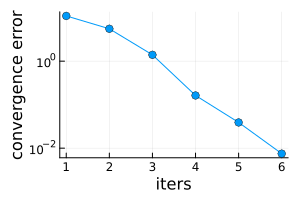

In [75]:
pl_err = plot(cb.Δs, ylabel="convergence error", xlabel="iters", m=:o, yaxis=:log10, 
    size=(300,200), label="")

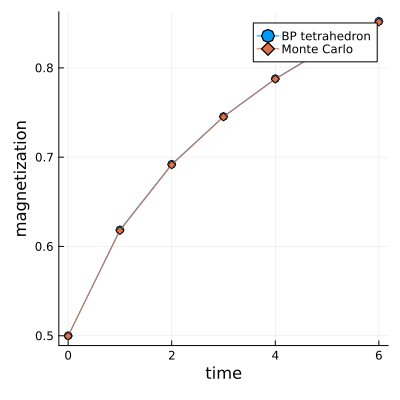

In [76]:
m_bp = cb.mag[end]
pl = plot(0:T, mean(m_bp), xlabel="time", ylabel="magnetization", m=:o, size=(400,400),
    xticks=0:2:T, label="BP tetrahedron")
ff = readdlm("montecarlo_N1000.txt", Float64)
plot!(pl, ff[1:T+1,1], ff[1:T+1,2], label="Monte Carlo", m=:diamond)
pl

Observe magnetiz over BP iterations

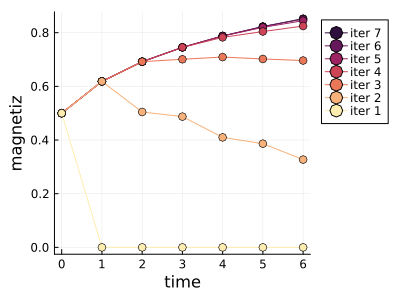

In [77]:
using ColorSchemes
cg = cgrad(:matter, length(cb.mag), categorical=true)
pll = plot(xlabel="time", ylabel="magnetiz",legend=:outertopright)
for i in reverse( eachindex(cb.mag) )
    plot!(pll, 0:T, mean(cb.mag[i]), c=cg[i], label="iter $i", m=:o)
end
plot(pll, size=(400,300))

## Use messages as starting point for RS

In [78]:
include("../ensemble.jl")

magnetization_rs_deg3 (generic function with 1 method)

In [83]:
A = deepcopy(bp.μ[1])
pᵢ⁰ = p⁰[1]
ϕᵢ = ϕ[1]
wᵢ = fill( GlauberFactor(ones(3), 0.0, β), T )
ε = 1e-4

0.0001

In [84]:
Δs = zeros(0)
A, iters, Δs = iterate_rs_deg3(A, pᵢ⁰, wᵢ, ϕᵢ; ε, maxiter=100, tol=1e-3, Δs, verbose=true, showprogress=false)
println("### Computing magnetization...\n")
mag = magnetization_rs_deg3(A, pᵢ⁰, wᵢ, ϕᵢ; ε);


### iter 1 of 100
Δ: 0.00011069279686209965 / 0.001
bonds:	[4, 14, 18, 14, 6, 2]

### Computing magnetization...



Computing belief  40%|██████████████                     |  ETA: 0:00:20
4m  t:  2/6
Computing belief  60%|█████████████████████              |  ETA: 0:00:18
4m  t:  3/6
Computing belief 100%|███████████████████████████████████| Time: 0:00:28
  t:  5/6
Converting B to C  33%|███████████▍                      |  ETA: 0:00:06
4m  t:  2/6
Converting B to C  50%|█████████████████                 |  ETA: 0:00:14
4m  t:  3/6
Converting B to C  67%|██████████████████████▋           |  ETA: 0:00:08
4m  t:  4/6
Converting B to C 100%|██████████████████████████████████| Time: 0:00:16
  t:  6/6


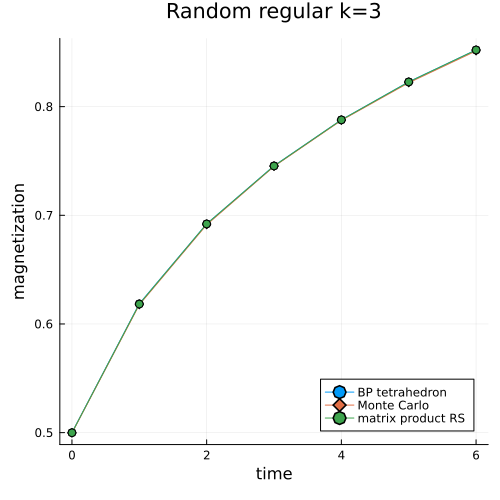

In [85]:
plot!(deepcopy(pl), 0:T, mag, label="matrix product RS", m=:o, title="Random regular k=3",
    legend=:bottomright, size=(500,500))